# I/GET DATA

In [1]:
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
#IMPORT TABLE
df1=pd.read_csv('/content/drive/MyDrive/Final_project_Data/DATASET/master.csv')
df2=pd.read_csv('/content/drive/MyDrive/Final_project_Data/DATASET/suicide_dataset.csv')
df4=pd.read_csv('/content/drive/MyDrive/Final_project_Data/DATASET/Facilities.csv')
df5=pd.read_csv('/content/drive/MyDrive/Final_project_Data/DATASET/Human Resources.csv')

In [3]:
df1.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df2.head()

,Country,Sex,Year,Suicide Rate,Mental hospitals (per 100 000 population),Mental health units in general hospitals (per 100 000 population),Mental health outpatient facilities (per 100 000 population),Mental health day treatment facilities (per 100 000 population),Community residential facilities (per 100 000 population),Psychiatrists working in mental health sector (per 100 000 population),Nurses working in mental health sector (per 100 000 population),Social workers working in mental health sector (per 100 000 population),Psychologists working in mental health sector (per 100 000 population),Government expenditures on mental hospitals as a percentage of total government expenditures on mental health (%),Stand-alone law for mental health,Year the law was enacted (latest revision),Stand-alone policy or plan for mental health,Publication year of the policy or plan (latest revision),Beds in community residential facilities (per 100k population),Beds in mental hospitals (per 100k population),Beds for mental health in general hospitals (per 100k population)
0,Afghanistan,Both sexes,2000,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Male,2000,14.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Female,2000,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,Both sexes,2000,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,Male,2000,8.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df4.sort_values('Country', ascending=True).head(5)

,Country,Year,Mental _hospitals,health_units,outpatient _facilities,day _treatment,residential_facilities
0,Afghanistan,2016,0.003,0.012,0.006,NaN,NaN
1,Albania,2016,0.068,0.068,0.410,NaN,0.445
2,Algeria,2016,0.048,0.068,0.048,NaN,NaN
3,Angola,2016,0.011,NaN,NaN,NaN,0.014
4,Antigua and Barbuda,2016,1.001,NaN,NaN,NaN,NaN


In [6]:
df5.sort_values('Country', ascending=True).head(5)

,Country,Year,Psychiatrists,Nurses,Social_workers,Psychologists
0,Afghanistan,2016,0.231,0.098,NaN,0.296
1,Albania,2016,1.471,6.876,1.060,1.231
2,Angola,2016,0.057,0.660,0.022,0.179
3,Antigua and Barbuda,2016,1.001,7.005,4.003,NaN
4,Argentina,2016,21.705,NaN,NaN,222.572


# II/CLEAN DATA

## 1/Remove unwanted data

In [7]:
df_suicide_rate=df1.drop(columns=['country-year', 'generation','HDI for year']) 
df_suicide_rate_2016=df2.sort_values(['Country','Sex'], ascending=True)
df_facilities_2016=df4.drop(columns=['day _treatment', 'residential_facilities']) 
df_human_resources_2016=df5.sort_values(['Country','Year'], ascending=True)



In [8]:
df_suicide_rate = df_suicide_rate.rename(columns={'country':'Country', 'year':'Year', 'sex':'Sex', 'age':'Age', 'suicides_no':'No.Suicides', 'population':'Population', 'suicides/100k pop':'Suicides_rate/100k pop',' gdp_for_year ($) ':'GDP ($)', 'gdp_per_capita ($)':'GDP/Capita ($)'})
def clean_age(x):
  if x['Age']=='5-14 years':
    return '05-14 years'
  else :
    return x['Age']
df_suicide_rate['Age']=df_suicide_rate.apply(clean_age,axis=1)
df_suicide_rate=df_suicide_rate.sort_values(['Country','Year','Sex','Age'], ascending=True)
df_suicide_rate.head(10)

,Country,Year,Sex,Age,No.Suicides,Population,Suicides_rate/100k pop,GDP ($),GDP/Capita ($)
9,Albania,1987,female,05-14 years,0,311000,0.00,"2,156,624,900",796
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796
7,Albania,1987,female,25-34 years,4,257200,1.56,"2,156,624,900",796
6,Albania,1987,female,35-54 years,6,278800,2.15,"2,156,624,900",796
10,Albania,1987,female,55-74 years,0,144600,0.00,"2,156,624,900",796
5,Albania,1987,female,75+ years,1,35600,2.81,"2,156,624,900",796
11,Albania,1987,male,05-14 years,0,338200,0.00,"2,156,624,900",796
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796


In [9]:
df_suicide_rate_2016=df_suicide_rate_2016[df_suicide_rate_2016['Year']==2016]

In [10]:
df_facilities_2016=df_facilities_2016.rename(columns={'health_units':'Health_units' , 'outpatient _facilities':'Outpatient_facilities','Mental _hospitals':'Mental_hospitals'})
df_facilities_2016=df_facilities_2016.sort_values(['Country','Year'], ascending=True)
df_facilities_2016.head()

,Country,Year,Mental_hospitals,Health_units,Outpatient_facilities
0,Afghanistan,2016,0.003,0.012,0.006
1,Albania,2016,0.068,0.068,0.410
2,Algeria,2016,0.048,0.068,0.048
3,Angola,2016,0.011,NaN,NaN
4,Antigua and Barbuda,2016,1.001,NaN,NaN


In [11]:
df_human_resources_2016.head()

,Country,Year,Psychiatrists,Nurses,Social_workers,Psychologists
0,Afghanistan,2016,0.231,0.098,NaN,0.296
1,Albania,2016,1.471,6.876,1.060,1.231
2,Angola,2016,0.057,0.660,0.022,0.179
3,Antigua and Barbuda,2016,1.001,7.005,4.003,NaN
4,Argentina,2016,21.705,NaN,NaN,222.572


## 2/Check and change datatype

In [12]:
# GDP str to int
import re
def clean_gdp(x):
   a= re.sub(',' , '', x.loc['GDP ($)'])
   a=int(a)
   return a
df_suicide_rate['GDP ($)']=df_suicide_rate.apply(clean_gdp,axis=1)

In [13]:
df_suicide_rate.head()

,Country,Year,Sex,Age,No.Suicides,Population,Suicides_rate/100k pop,GDP ($),GDP/Capita ($)
9,Albania,1987,female,05-14 years,0,311000,0.00,2156624900,796
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796
7,Albania,1987,female,25-34 years,4,257200,1.56,2156624900,796
6,Albania,1987,female,35-54 years,6,278800,2.15,2156624900,796
10,Albania,1987,female,55-74 years,0,144600,0.00,2156624900,796


## 3/Working with Missing Values

In [14]:
#% missing data of each collumn
df_suicide_rate.isna().sum()/df_suicide_rate.shape[0]*100

Country                   0.0
Year                      0.0
Sex                       0.0
Age                       0.0
No.Suicides               0.0
Population                0.0
Suicides_rate/100k pop    0.0
GDP ($)                   0.0
GDP/Capita ($)            0.0
dtype: float64

In [15]:
#% missing data of each collumn
df_suicide_rate_2016.isna().sum()/df_suicide_rate_2016.shape[0]*100

Country                                                                                                               0.000000
Sex                                                                                                                   0.543478
Year                                                                                                                  0.000000
Suicide Rate                                                                                                          0.543478
Mental hospitals (per 100 000 population)                                                                            51.086957
Mental health units in general hospitals (per 100 000 population)                                                    44.927536
Mental health outpatient facilities (per 100 000 population)                                                         46.739130
Mental health day treatment facilities (per 100 000 population)                                                

In [16]:
df_suicide_rate_2016=df_suicide_rate_2016[['Country','Sex','Suicide Rate','Year the law was enacted (latest revision)','Publication year of the policy or plan (latest revision)']]
df_suicide_rate_2016['Year the law was enacted (latest revision)'] = df_suicide_rate_2016['Year the law was enacted (latest revision)'].fillna(0)
df_suicide_rate_2016['Publication year of the policy or plan (latest revision)'] = df_suicide_rate_2016['Publication year of the policy or plan (latest revision)'].fillna(0)
df_suicide_rate_2016 = df_suicide_rate_2016.dropna(axis=0)
df_suicide_rate_2016.isna().sum()/df_suicide_rate_2016.shape[0]*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Country                                                     0.0
Sex                                                         0.0
Suicide Rate                                                0.0
Year the law was enacted (latest revision)                  0.0
Publication year of the policy or plan (latest revision)    0.0
dtype: float64

In [17]:
#% missing data of each collumn
df_facilities_2016.isna().sum()/df_facilities_2016.shape[0]*100

Country                   0.000000
Year                      0.000000
Mental_hospitals         19.642857
Health_units              8.928571
Outpatient_facilities    10.714286
dtype: float64

In [18]:
df_facilities_2016['Mental_hospitals'] = df_facilities_2016['Mental_hospitals'].fillna(df_facilities_2016['Mental_hospitals'].mean())
df_facilities_2016['Health_units'] = df_facilities_2016['Health_units'].fillna(df_facilities_2016['Health_units'].mean())
df_facilities_2016['Outpatient_facilities'] = df_facilities_2016['Outpatient_facilities'].fillna(df_facilities_2016['Outpatient_facilities'].mean())
#% missing data of each collumn
df_facilities_2016.isna().sum()/df_facilities_2016.shape[0]*100

Country                  0.0
Year                     0.0
Mental_hospitals         0.0
Health_units             0.0
Outpatient_facilities    0.0
dtype: float64

In [19]:
#% missing data of each collumn
df_human_resources_2016.isna().sum()/df_human_resources_2016.shape[0]*100

Country            0.000000
Year               0.000000
Psychiatrists      2.803738
Nurses            14.953271
Social_workers    36.448598
Psychologists     21.495327
dtype: float64

In [20]:
df_human_resources_2016['Psychiatrists'] = df_human_resources_2016['Psychiatrists'].fillna(df_human_resources_2016['Psychiatrists'].mean())
df_human_resources_2016['Nurses'] = df_human_resources_2016['Nurses'].fillna(df_human_resources_2016['Nurses'].mean())
df_human_resources_2016['Social_workers'] = df_human_resources_2016['Social_workers'].fillna(df_human_resources_2016['Social_workers'].mean())
df_human_resources_2016['Psychologists'] = df_human_resources_2016['Psychologists'].fillna(df_human_resources_2016['Psychologists'].mean())
#% missing data of each collumn
df_human_resources_2016.isna().sum()/df_human_resources_2016.shape[0]*100

Country           0.0
Year              0.0
Psychiatrists     0.0
Nurses            0.0
Social_workers    0.0
Psychologists     0.0
dtype: float64

## 4/Handling duplicated data

In [21]:
df_suicide_rate.duplicated().sum()

0

In [22]:
df_suicide_rate_2016.duplicated().sum()

0

In [23]:
df_facilities_2016.duplicated().sum()

0

In [24]:
df_human_resources_2016.duplicated().sum()

0

## 5/Handle mislabeled and corrupted data

In [25]:
pd.options.display.float_format = "{:.2f}".format

In [26]:
df_suicide_rate.describe()

,Year,No.Suicides,Population,Suicides_rate/100k pop,GDP ($),GDP/Capita ($)
count,27820.00,27820.00,27820.00,27820.00,27820.00,27820.00
mean,2001.26,242.57,1844793.62,12.82,445580969025.73,16866.46
std,8.47,902.05,3911779.44,18.96,1453609985940.92,18887.58
min,1985.00,0.00,278.00,0.00,46919625.00,251.00
25%,1995.00,3.00,97498.50,0.92,8985352832.00,3447.00
50%,2002.00,25.00,430150.00,5.99,48114688201.00,9372.00
75%,2008.00,131.00,1486143.25,16.62,260202429150.00,24874.00
max,2016.00,22338.00,43805214.00,224.97,18120714000000.00,126352.00


In [27]:
df_suicide_rate[df_suicide_rate['Suicides_rate/100k pop']>=100]

,Country,Year,Sex,Age,No.Suicides,Population,Suicides_rate/100k pop,GDP ($),GDP/Capita ($)
1258,Aruba,1995,male,75+ years,2,889,224.97,1320670391,17949
1282,Aruba,2000,female,75+ years,2,1499,133.42,1873452514,22333
1283,Aruba,2000,male,75+ years,1,989,101.11,1873452514,22333
1798,Austria,1986,male,75+ years,173,158694,109.01,99036165210,13911
1810,Austria,1987,male,75+ years,208,161591,128.72,124168442860,17415
...,...,...,...,...,...,...,...,...,...
24092,Suriname,1990,male,75+ years,3,2000,150.00,388300000,1114
24308,Suriname,2010,male,75+ years,5,4994,100.12,4368398048,9176
24332,Suriname,2012,male,75+ years,10,5346,187.06,4980000000,10227
27364,Uruguay,1999,male,75+ years,66,62922,104.89,23983945191,7903


In [28]:
# Categorical 
df_suicide_rate['Country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [29]:
df_suicide_rate.sort_values(['Year'], ascending=True)['Year'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [30]:
def clean_sex(x):
  if x['Sex']=='female':
    return 'Female'
  else:
    return 'Male'
df_suicide_rate['Sex']=df_suicide_rate.apply(clean_sex,axis=1)

In [31]:

df_suicide_rate['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [32]:
df_suicide_rate['Age'].unique()

array(['05-14 years', '15-24 years', '25-34 years', '35-54 years',
       '55-74 years', '75+ years'], dtype=object)

In [33]:
df_suicide_rate_2016.describe()


,Suicide Rate,Publication year of the policy or plan (latest revision)
count,549.00,549.00
mean,9.79,989.80
std,7.47,1007.08
min,0.00,0.00
25%,4.30,0.00
50%,7.90,0.00
75%,13.40,2014.00
max,48.30,2017.00


In [34]:
len(df_suicide_rate_2016['Country'].unique())

183

In [35]:
df_suicide_rate_2016['Year the law was enacted (latest revision)'].unique()

array(['1987', '2012', '1905', 0, '1957', '2013', '2004', '2011', '2015',
       'No', '2001', '2014', '2006', '2009', '2010', '2016', '1964',
       '2007', '1999', '1930', '2017', '1989', '2005', '1838', '1959',
       '1912', '1973', '1992', '2018', '1998', '1975', '2008', '2002',
       '1953', '1936', '1951', '1996'], dtype=object)

In [36]:
df_facilities_2016.describe()

,Year,Mental_hospitals,Health_units,Outpatient_facilities
count,112.00,112.00,112.00,112.00
mean,2016.00,0.25,0.32,1.88
std,0.00,0.82,0.59,3.05
min,2016.00,0.00,0.01,0.01
25%,2016.00,0.02,0.04,0.16
50%,2016.00,0.08,0.13,0.88
75%,2016.00,0.25,0.33,1.88
max,2016.00,8.31,4.54,19.75


In [37]:
print(len(df_facilities_2016['Country'].unique()))
df_facilities_2016['Country'].unique()

112


array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Brazil', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Cambodia', 'Chad', 'Chile',
       'Colombia', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', "Côte d'Ivoire", 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Eritrea', 'Estonia', 'Fiji', 'Gabon', 'Georgia',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Ireland', 'Israel', 'Japan', 'Jordan', 'Kenya',
       'Kyrgyzstan', 'Liberia', 'Libya', 'Lithuania', 'Madagascar',
       'Malaysia', 'Mali', 'Mexico', 'Monaco', 'Mongolia', 'Montenegro',
       'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal',
       'New Zealand', 'Niger', 'Norway', 'Pakistan', 'Pan

In [38]:
df_facilities_2016['Year'].unique()

array([2016])

In [39]:
df_human_resources_2016.describe()

,Year,Psychiatrists,Nurses,Social_workers,Psychologists
count,107.00,107.00,107.00,107.00,107.00
mean,2016.00,4.34,12.12,4.83,10.42
std,0.00,7.54,21.07,13.44,27.83
min,2016.00,0.01,0.00,0.01,0.00
25%,2016.00,0.23,1.00,0.23,0.41
50%,2016.00,1.32,6.00,1.61,2.08
75%,2016.00,4.34,12.12,4.83,10.42
max,2016.00,48.04,150.25,102.59,222.57


In [40]:
print(len(df_human_resources_2016['Country'].unique()))
df_human_resources_2016['Country'].unique()

107


array(['Afghanistan', 'Albania', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus',
       'Belize', 'Bhutan', 'Bolivia (Plurinational State of)', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Cambodia',
       'Chad', 'Chile', 'Colombia', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', "Côte d'Ivoire", 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Fiji',
       'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Hungary', 'India', 'Indonesia', 'Israel', 'Japan', 'Jordan',
       'Kenya', 'Kyrgyzstan', 'Liberia', 'Lithuania', 'Madagascar',
       'Malaysia', 'Mali', 'Mexico', 'Monaco', 'Mongolia', 'Montenegro',
       'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal',
       'New Zealand', 'Niger', 'Norway', 'Panama', 'Peru', 'Philippines',
       'Poland', 'Qata

In [41]:
df_human_resources_2016['Year'].unique()

array([2016])

# III/READY DATA

## 1/Suicide rate

In [42]:
#Suicide rate by Country every year
df_country_suicide=df_suicide_rate.groupby(['Country','Year','GDP ($)','GDP/Capita ($)'])['No.Suicides','Population'].sum().reset_index()

df_country_suicide['Suicides_rate/100k pop']=df_country_suicide['No.Suicides']/df_country_suicide['Population']*100000
df_country_suicide.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Country,Year,GDP ($),GDP/Capita ($),No.Suicides,Population,Suicides_rate/100k pop
0,Albania,1987,2156624900,796,73,2709600,2.69
1,Albania,1988,2126000000,769,63,2764300,2.28
2,Albania,1989,2335124988,833,68,2803100,2.43
3,Albania,1992,709452584,251,47,2822500,1.67
4,Albania,1993,1228071038,437,73,2807300,2.60


In [43]:
df_country_suicide['Country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [44]:
df_country_suicide[df_country_suicide['Year']==2015]['Country'].unique()

array(['Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Belgium', 'Belize', 'Brazil', 'Chile', 'Colombia',
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Ecuador', 'Estonia', 'Finland', 'Georgia', 'Germany', 'Greece',
       'Grenada', 'Guatemala', 'Hungary', 'Iceland', 'Israel', 'Italy',
       'Japan', 'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Mauritius', 'Mexico', 'Netherlands',
       'Nicaragua', 'Norway', 'Panama', 'Poland', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', 'Russian Federation',
       'Saint Vincent and Grenadines', 'Serbia', 'Seychelles',
       'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Thailand', 'Turkey', 'Turkmenistan', 'Ukraine',
       'United Kingdom', 'United States', 'Uruguay'], dtype=object)

In [45]:
df_country_suicide[df_country_suicide['Year']==2016].sort_values(['Country'])

,Country,Year,GDP ($),GDP/Capita ($),No.Suicides,Population,Suicides_rate/100k pop
104,Armenia,2016,10546135160,3788,67,2400033,2.79
180,Austria,2016,390799991147,46976,1201,7484629,16.05
552,Croatia,2016,51338524831,12905,683,3567043,19.15
591,Cyprus,2016,20153871681,25098,36,711344,5.06
618,Czech Republic,2016,195305084919,19505,1318,8929942,14.76
892,Grenada,2016,1056188593,10838,0,79012,0.00
973,Hungary,2016,125816640421,13448,1761,8390370,20.99
1005,Iceland,2016,20304098101,64708,40,268773,14.88
1276,Lithuania,2016,42773029835,15742,822,2445296,33.62
1381,Mauritius,2016,12232463656,10570,98,992432,9.87


In [46]:
#Suicide rate by Sex every year
df_total_suicide=df_suicide_rate.groupby(['Year','Sex'])['No.Suicides','Population'].sum().reset_index()

df_total_suicide['Suicides_rate/100k pop']=df_total_suicide['No.Suicides']/df_total_suicide['Population']*100000
df_total_suicide.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Year,Sex,No.Suicides,Population,Suicides_rate/100k pop
0,1985,Female,32479,513013055,6.33
1,1985,Male,83584,495587031,16.87
2,1986,Female,33852,524465866,6.45
3,1986,Male,86818,505443747,17.18
4,1987,Female,35006,559183789,6.26


In [47]:
#Suicide rate by Age all time
df_age_suicide=df_suicide_rate.groupby(['Age'])['No.Suicides','Population'].sum().reset_index()

df_age_suicide['Suicides_rate/100k pop']=df_age_suicide['No.Suicides']/df_age_suicide['Population']*100000
df_age_suicide

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Age,No.Suicides,Population,Suicides_rate/100k pop
0,05-14 years,52264,8398693237,0.62
1,15-24 years,808542,8642946896,9.35
2,25-34 years,1123912,8438103587,13.32
3,35-54 years,2452141,14375888123,17.06
4,55-74 years,1658443,8803245340,18.84
5,75+ years,653118,2663281253,24.52


In [48]:
#Suicide rate by Country all time
df_country_suicide_all_time=df_suicide_rate.groupby(['Country']).agg({'GDP ($)':'mean','GDP/Capita ($)':'mean','No.Suicides':'mean','Suicides_rate/100k pop':'mean'}).reset_index()
df_country_suicide_all_time.head()

,Country,GDP ($),GDP/Capita ($),No.Suicides,Suicides_rate/100k pop
0,Albania,5211661212.14,1859.05,7.46,3.50
1,Antigua and Barbuda,803545216.70,10448.19,0.03,0.55
2,Argentina,274256497624.61,7914.10,221.02,10.47
3,Armenia,5386592177.83,1873.92,6.39,3.28
4,Aruba,2196223463.79,24221.64,0.60,9.50


In [49]:
#Classify countries function 
def classify_country(x):
  a=df_country_suicide_all_time['GDP/Capita ($)'].mean()
  upper=a*4/3
  lower=a*2/3
  if  x['GDP/Capita ($)']>=upper:
    return 'Rich'
  else:
    if x['GDP/Capita ($)']<=lower:
      return 'Poor'
    else:
      return 'Normal'
#Classify countries
df_country_suicide_all_time['Classify']=df_country_suicide_all_time.apply(classify_country,axis=1)
df_country_suicide_all_time.head()

,Country,GDP ($),GDP/Capita ($),No.Suicides,Suicides_rate/100k pop,Classify
0,Albania,5211661212.14,1859.05,7.46,3.50,Poor
1,Antigua and Barbuda,803545216.70,10448.19,0.03,0.55,Poor
2,Argentina,274256497624.61,7914.10,221.02,10.47,Poor
3,Armenia,5386592177.83,1873.92,6.39,3.28,Poor
4,Aruba,2196223463.79,24221.64,0.60,9.50,Rich


## 2/Facilities and Human resources in 2016

In [50]:
df_suicide_rate_2016.head()

,Country,Sex,Suicide Rate,Year the law was enacted (latest revision),Publication year of the policy or plan (latest revision)
1647,Afghanistan,Both sexes,6.40,1987,2016.00
1649,Afghanistan,Female,2.10,1987,2016.00
1648,Afghanistan,Male,10.60,1987,2016.00
1650,Albania,Both sexes,5.60,2012,2013.00
1652,Albania,Female,4.30,2012,2013.00


In [51]:
df_all_resources=pd.merge(df_facilities_2016, df_human_resources_2016, how='left', on=["Country",'Year'])
df_all_resources['Psychiatrists'] = df_all_resources['Psychiatrists'].fillna(df_all_resources['Psychiatrists'].mean())
df_all_resources['Nurses'] = df_all_resources['Nurses'].fillna(df_all_resources['Nurses'].mean())
df_all_resources['Social_workers'] = df_all_resources['Social_workers'].fillna(df_all_resources['Social_workers'].mean())
df_all_resources['Psychologists'] = df_all_resources['Psychologists'].fillna(df_all_resources['Psychologists'].mean())
df_all_resources.isna().sum()

Country                  0
Year                     0
Mental_hospitals         0
Health_units             0
Outpatient_facilities    0
Psychiatrists            0
Nurses                   0
Social_workers           0
Psychologists            0
dtype: int64

In [52]:
df_all_suicide_rate_2016=df_suicide_rate_2016[df_suicide_rate_2016['Sex']==' Both sexes']
df_all_suicide_rate_2016.head()

,Country,Sex,Suicide Rate,Year the law was enacted (latest revision),Publication year of the policy or plan (latest revision)
1647,Afghanistan,Both sexes,6.40,1987,2016.00
1650,Albania,Both sexes,5.60,2012,2013.00
1653,Algeria,Both sexes,3.30,1905,0.00
1656,Angola,Both sexes,8.90,0,0.00
1659,Antigua and Barbuda,Both sexes,0.50,1957,2013.00


In [53]:
df_2016=pd.merge(df_all_suicide_rate_2016, df_all_resources, how='left', on=["Country"])
df_2016 = df_2016.drop(columns=['Sex','Year'])
df_2016 = df_2016.dropna(axis=0)
df_2016.head()

,Country,Suicide Rate,Year the law was enacted (latest revision),Publication year of the policy or plan (latest revision),Mental_hospitals,Health_units,Outpatient_facilities,Psychiatrists,Nurses,Social_workers,Psychologists
0,Afghanistan,6.40,1987,2016.00,0.00,0.01,0.01,0.23,0.10,4.83,0.30
1,Albania,5.60,2012,2013.00,0.07,0.07,0.41,1.47,6.88,1.06,1.23
2,Algeria,3.30,1905,0.00,0.05,0.07,0.05,4.25,11.82,4.92,10.51
3,Angola,8.90,0,0.00,0.01,0.32,1.88,0.06,0.66,0.02,0.18
4,Antigua and Barbuda,0.50,1957,2013.00,1.00,0.32,1.88,1.00,7.00,4.00,10.42


# IV/VISUALIZATION DATA

## 1/Suicide rate around the world 

In [ ]:
df_country_suicide_all_time.corr().style.background_gradient(cmap='Blues')

,GDP ($),GDP/Capita ($),No.Suicides,Suicides_rate/100k pop
GDP ($),1.000000,0.274728,0.694625,0.081693
GDP/Capita ($),0.274728,1.000000,0.093967,0.038206
No.Suicides,0.694625,0.093967,1.000000,0.350454
Suicides_rate/100k pop,0.081693,0.038206,0.350454,1.000000


### Top 10 Highest number of suicide Countries of all time

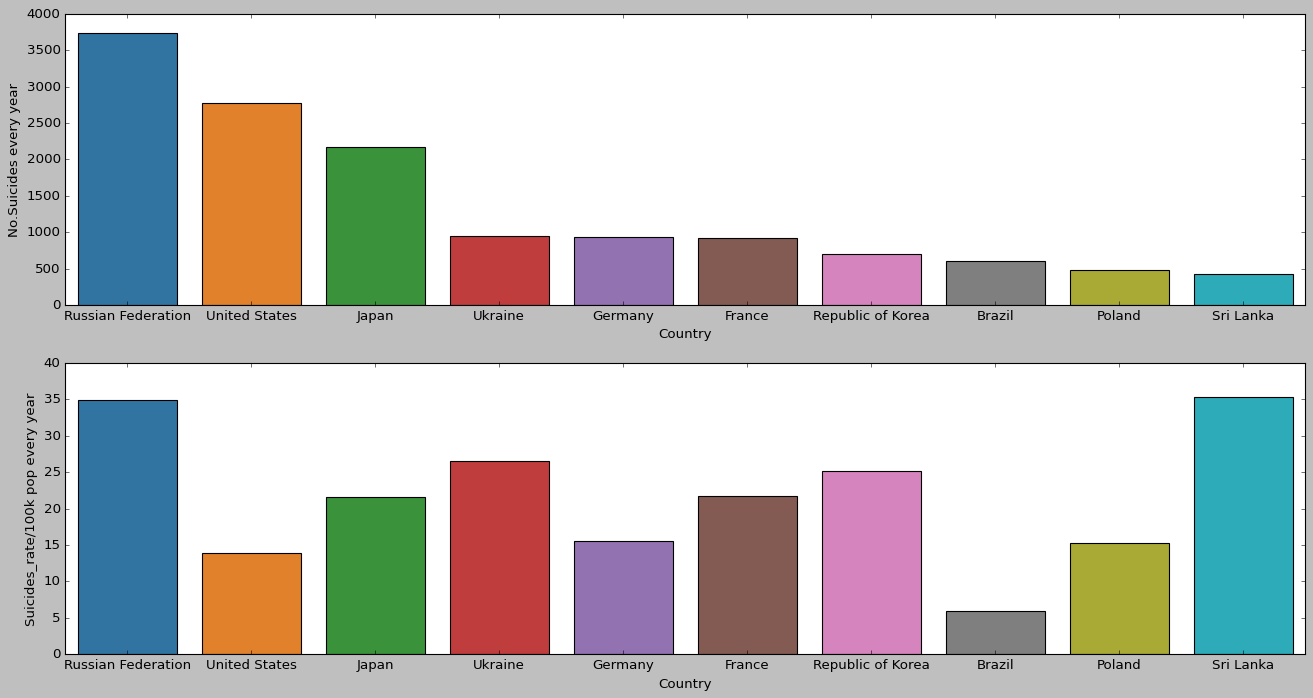

In [62]:
#Top 10 Countries have highest suicide rate of all time
df_country_suicide_all_time_top_10=df_country_suicide_all_time.sort_values(['No.Suicides'], ascending=False).head(10)
#Visualizing
plt.figure(figsize=(20,10))
plt.style.use('classic')

plt.subplot(211)
sns.barplot(data=df_country_suicide_all_time_top_10,x='Country',y='No.Suicides',palette="tab10")
plt.xlabel('Country')
plt.ylabel('No.Suicides every year')

plt.subplot(212)
sns.barplot(data=df_country_suicide_all_time_top_10,x='Country',y='Suicides_rate/100k pop',palette="tab10")
plt.xlabel('Country')
plt.ylabel('Suicides_rate/100k pop every year')

plt.savefig('country_suicide_all_time_top_10_suicide_rate.png')
plt.show()

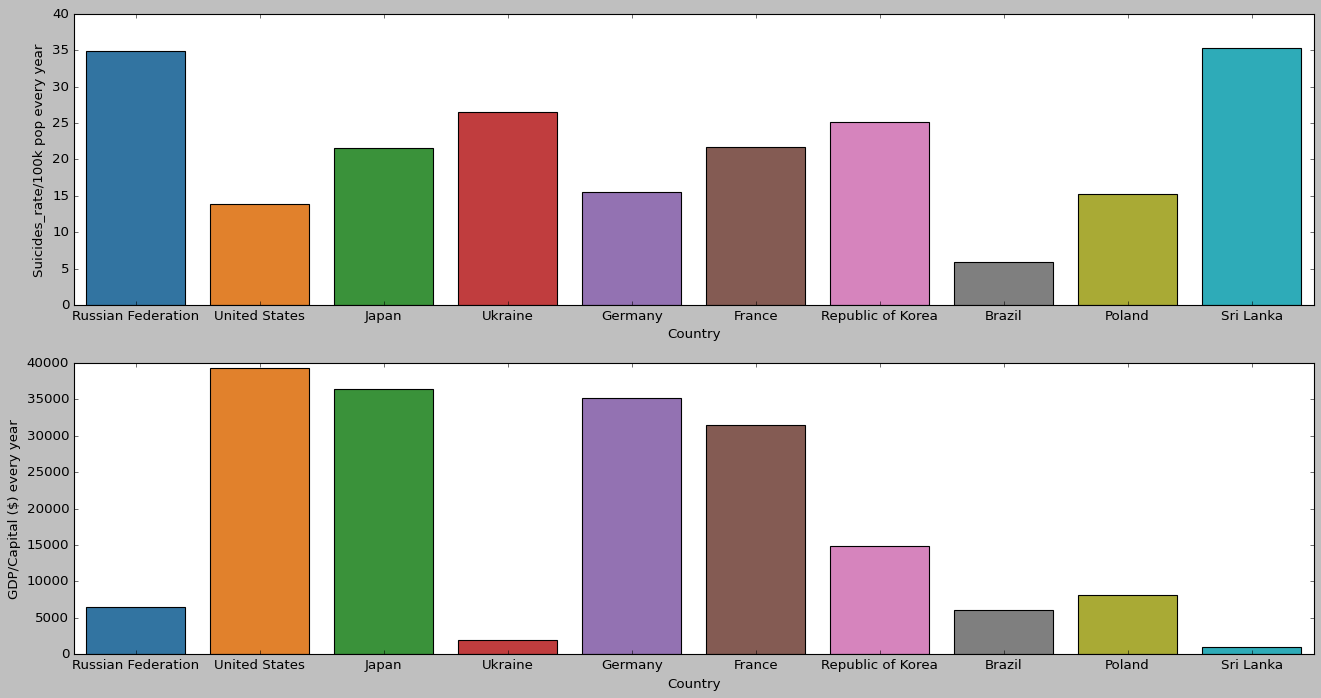

In [64]:
#Top 10 Countries have highest suicide rate of all time
df_country_suicide_all_time_top_10=df_country_suicide_all_time.sort_values(['No.Suicides'], ascending=False).head(10)
#Visualizing
plt.figure(figsize=(20,10))
plt.style.use('classic')

plt.subplot(211)
sns.barplot(data=df_country_suicide_all_time_top_10,x='Country',y='Suicides_rate/100k pop',palette="tab10")
#plt.suptitle('Top 10 Countries have most  Suicides rate of all time')
plt.xlabel('Country')
plt.ylabel('Suicides_rate/100k pop every year')

plt.subplot(212)
sns.barplot(data=df_country_suicide_all_time_top_10,x='Country',y='GDP/Capita ($)',palette="tab10")
plt.xlabel('Country')
plt.ylabel('GDP/Capital ($) every year')

plt.savefig('country_suicide_all_time_top_10_GDP.png')
plt.show()

### Top 10 Lowest  suicide rate  Countries of all time

In [ ]:
df_country_suicide_all_time_top_10

,Country,GDP ($),GDP/Capita ($),No.Suicides,Suicides_rate/100k pop,Classify
52,Lithuania,27710616213.31,9280.55,107.02,40.42,Poor
87,Sri Lanka,15326445828.55,904.27,421.52,35.30,Poor
75,Russian Federation,884322917284.89,6518.81,3733.77,34.89,Poor
40,Hungary,89523797350.83,9370.05,238.36,32.76,Poor
11,Belarus,30676414843.48,3333.90,237.67,31.08,Poor
47,Kazakhstan,78687217446.19,5329.12,325.47,30.51,Poor
51,Latvia,18316604055.81,8961.10,50.67,29.26,Poor
84,Slovenia,35900063292.00,18642.24,42.12,27.83,Normal
30,Estonia,14445861374.19,11376.10,27.91,27.28,Normal
95,Ukraine,83891109353.86,1867.54,952.23,26.58,Poor


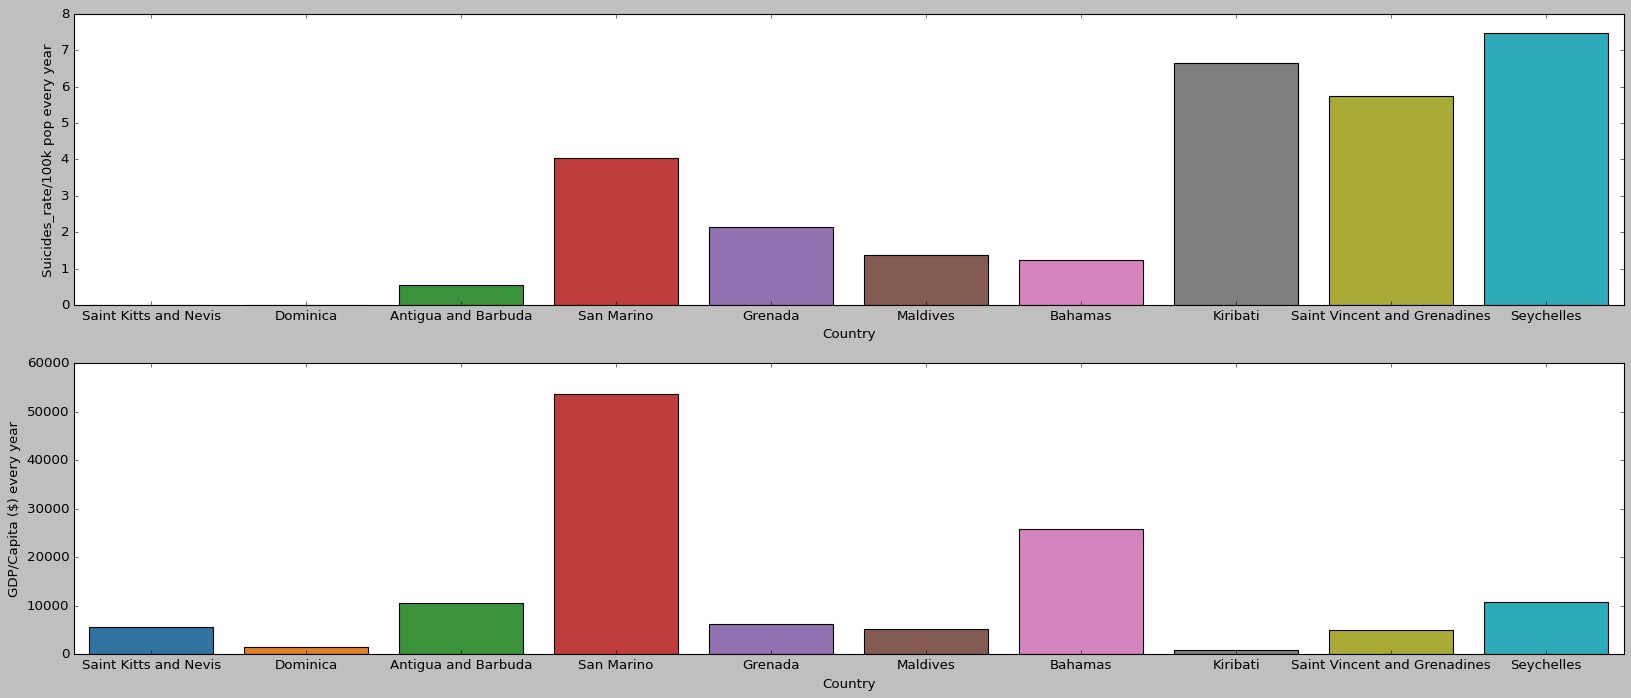

In [63]:
#Top 10 Countries have lowest suicide rate of all time
df_country_suicide_all_time_top_10=df_country_suicide_all_time.sort_values(['No.Suicides'], ascending=True).head(10)
#Visualizing
plt.figure(figsize=(25,10))
plt.style.use('classic')
plt.subplot(211)
sns.barplot(data=df_country_suicide_all_time_top_10,x='Country',y='Suicides_rate/100k pop',palette="tab10")
#plt.suptitle('Top 10 Countries have lowest Suicides rate of all time')
plt.xlabel('Country')
plt.ylabel('Suicides_rate/100k pop every year')

plt.subplot(212)
sns.barplot(data=df_country_suicide_all_time_top_10,x='Country',y='GDP/Capita ($)',palette="tab10")
plt.xlabel('Country')
plt.ylabel('GDP/Capita ($) every year')
plt.savefig('country_lowest_suicide_all_time_top_10.png')
plt.show()

### Number of Suicides by classify countries of  all time

In [ ]:
df_country_suicide_all_time.corr().style.background_gradient(cmap='Blues')

,GDP ($),GDP/Capita ($),No.Suicides,Suicides_rate/100k pop
GDP ($),1.000000,0.274728,0.694625,0.081693
GDP/Capita ($),0.274728,1.000000,0.093967,0.038206
No.Suicides,0.694625,0.093967,1.000000,0.350454
Suicides_rate/100k pop,0.081693,0.038206,0.350454,1.000000


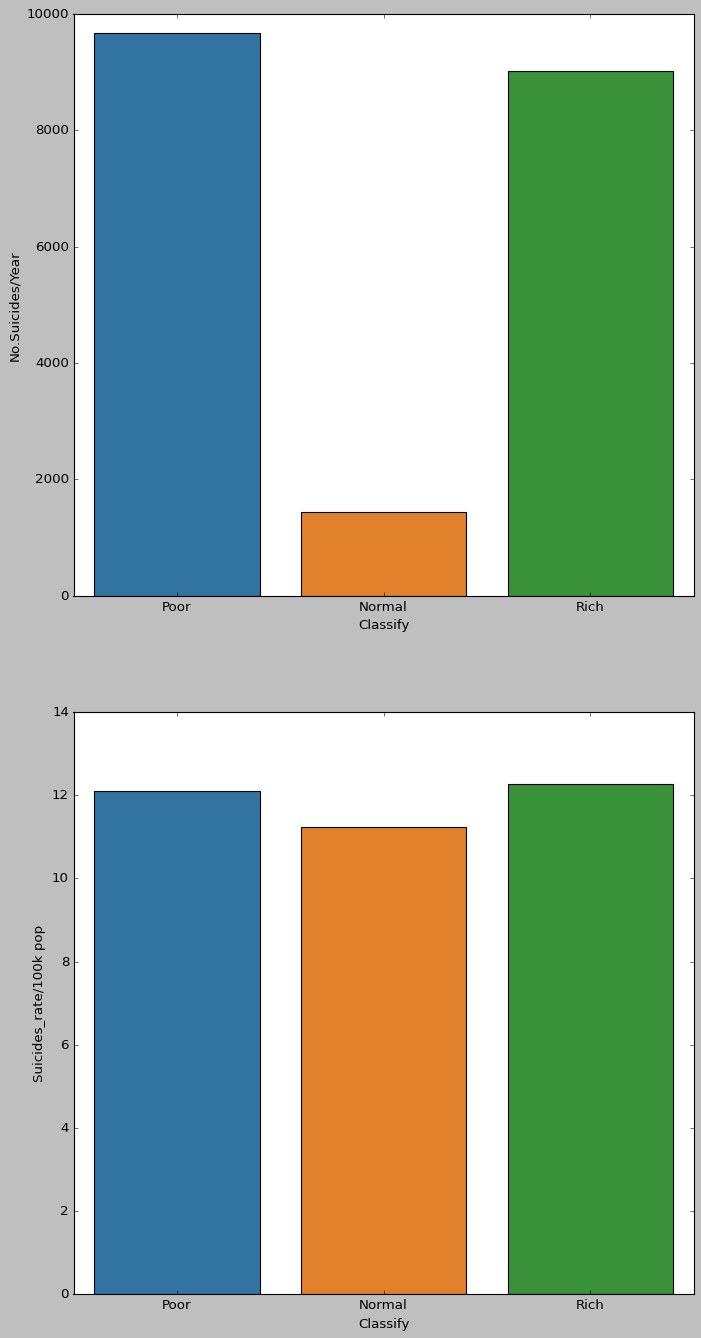

In [66]:

#Suicide rate by classify countries
df_country_classify_all_time=df_country_suicide_all_time.groupby(['Classify']).agg({'No.Suicides':'sum','Suicides_rate/100k pop':'mean'}).reset_index()
#Visualizing
plt.figure(figsize=(10,20))
plt.style.use('classic')
plt.subplot(211)
sns.barplot(data=df_country_classify_all_time,x='Classify',y='No.Suicides',palette="tab10",order=['Poor','Normal','Rich'])
plt.xlabel('Classify')
plt.ylabel('No.Suicides/Year')

plt.subplot(212)
sns.barplot(data=df_country_classify_all_time,x='Classify',y='Suicides_rate/100k pop',palette="tab10",order=['Poor','Normal','Rich'])
plt.xlabel('Classify')
plt.ylabel('Suicides_rate/100k pop')
plt.savefig('countries_suicide_classify.png')
plt.show()

Rich and Poor people are more easy to commit suicide than Normal people.



### No.Suicide by Age of all time

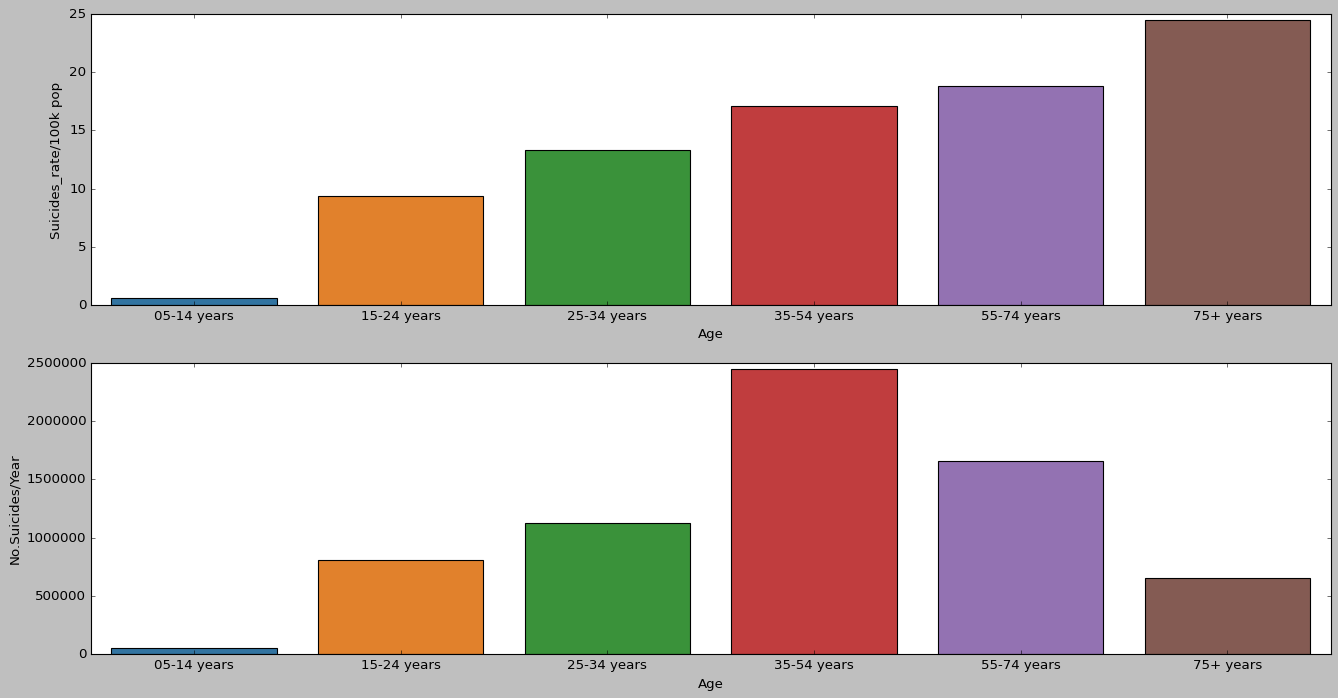

In [ ]:
plt.figure(figsize=(20,10))
plt.style.use('classic')
plt.subplot(211)
sns.barplot(data=df_age_suicide,x='Age',y='Suicides_rate/100k pop',palette="tab10")
plt.xlabel('Age')
plt.ylabel('Suicides_rate/100k pop')

plt.subplot(212)
sns.barplot(data=df_age_suicide,x='Age',y='No.Suicides',palette="tab10")
plt.xlabel('Age')
plt.ylabel('No.Suicides/Year')
plt.savefig('countries_suicide_age.png')
plt.show()



Suicide rate increases when people older. The elder more easy think of dead because they know they live long enough.

The people at 35-54 years old has number of Suicides highest in all of Ages even the Suicide rate not so high.




### No.Suicides every year over the world

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


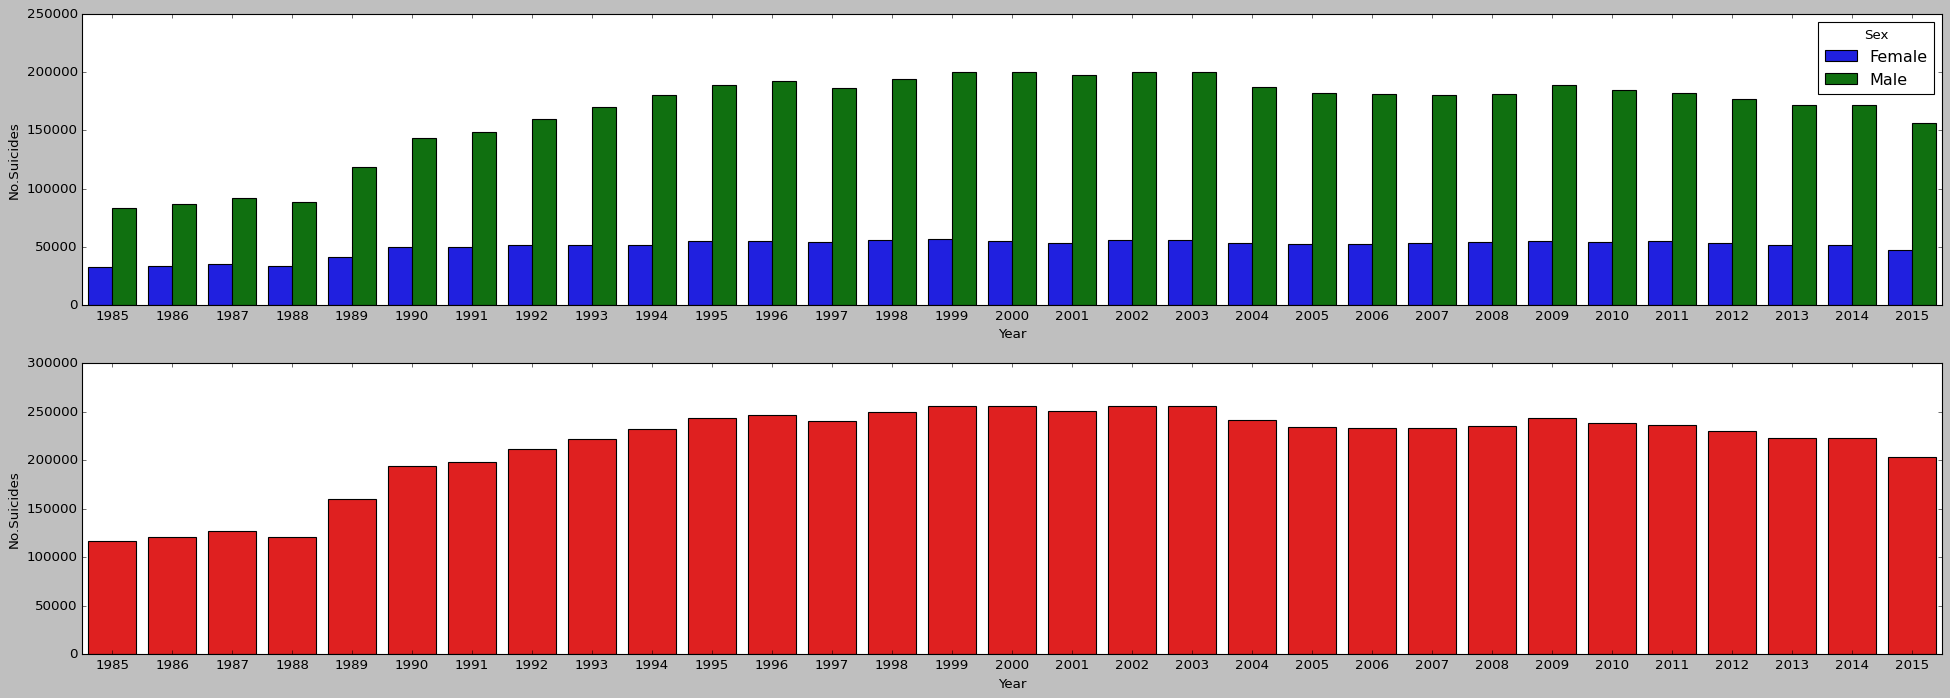

In [67]:
#Suicide every year
df_total_world_suicide=df_total_suicide.groupby(['Year'])['No.Suicides','Population'].sum().reset_index()
#Visualizing
plt.figure(figsize=(30,10))
plt.style.use('classic')
plt.subplot(211)
sns.barplot(data=df_total_suicide[df_total_suicide['Year']<2016],x='Year',y='No.Suicides',hue='Sex')
plt.xlabel('Year')
plt.ylabel('No.Suicides')

plt.subplot(212)
sns.barplot(data=df_total_world_suicide[df_total_world_suicide['Year']<2016],x='Year',y='No.Suicides',color='red')
plt.xlabel('Year')
plt.ylabel('No.Suicides')
#plt.ylim(100000,270000)
#plt.xlim(1985,2015)
plt.savefig('countries_suicide_sex.png')
plt.show()

In [ ]:
df_country_suicide.corr().style.background_gradient(cmap='Blues')

,Year,GDP ($),GDP/Capita ($),No.Suicides,Population,Suicides_rate/100k pop
Year,1.000000,0.094001,0.339188,-0.007759,0.008887,-0.015713
GDP ($),0.094001,1.000000,0.303126,0.657589,0.800281,0.071868
GDP/Capita ($),0.339188,0.303126,1.000000,0.093461,0.091413,0.060367
No.Suicides,-0.007759,0.657589,0.093461,1.000000,0.808095,0.360253
Population,0.008887,0.800281,0.091413,0.808095,1.000000,0.083918
Suicides_rate/100k pop,-0.015713,0.071868,0.060367,0.360253,0.083918,1.000000


## 2/Mental Health around the world 

In [ ]:
df_2016.corr().style.background_gradient(cmap='Blues')

,Suicide Rate,Publication year of the policy or plan (latest revision),Mental_hospitals,Health_units,Outpatient_facilities,Psychiatrists,Nurses,Social_workers,Psychologists
Suicide Rate,1.000000,0.133710,0.066248,0.069341,-0.012138,0.223069,0.123948,0.037059,-0.034380
Publication year of the policy or plan (latest revision),0.133710,1.000000,0.023392,-0.024847,-0.166790,0.039441,0.018098,0.068703,0.039278
Mental_hospitals,0.066248,0.023392,1.000000,0.089851,0.264712,0.172112,0.344275,0.046963,0.058915
Health_units,0.069341,-0.024847,0.089851,1.000000,0.287939,0.204272,0.164265,0.019589,0.091049
Outpatient_facilities,-0.012138,-0.166790,0.264712,0.287939,1.000000,0.169225,0.270514,-0.024475,0.034463
Psychiatrists,0.223069,0.039441,0.172112,0.204272,0.169225,1.000000,0.353814,0.130752,0.429594
Nurses,0.123948,0.018098,0.344275,0.164265,0.270514,0.353814,1.000000,0.006002,0.016377
Social_workers,0.037059,0.068703,0.046963,0.019589,-0.024475,0.130752,0.006002,1.000000,0.441985
Psychologists,-0.034380,0.039278,0.058915,0.091049,0.034463,0.429594,0.016377,0.441985,1.000000


### Top 5 Highest suicide rate Countries in 2016

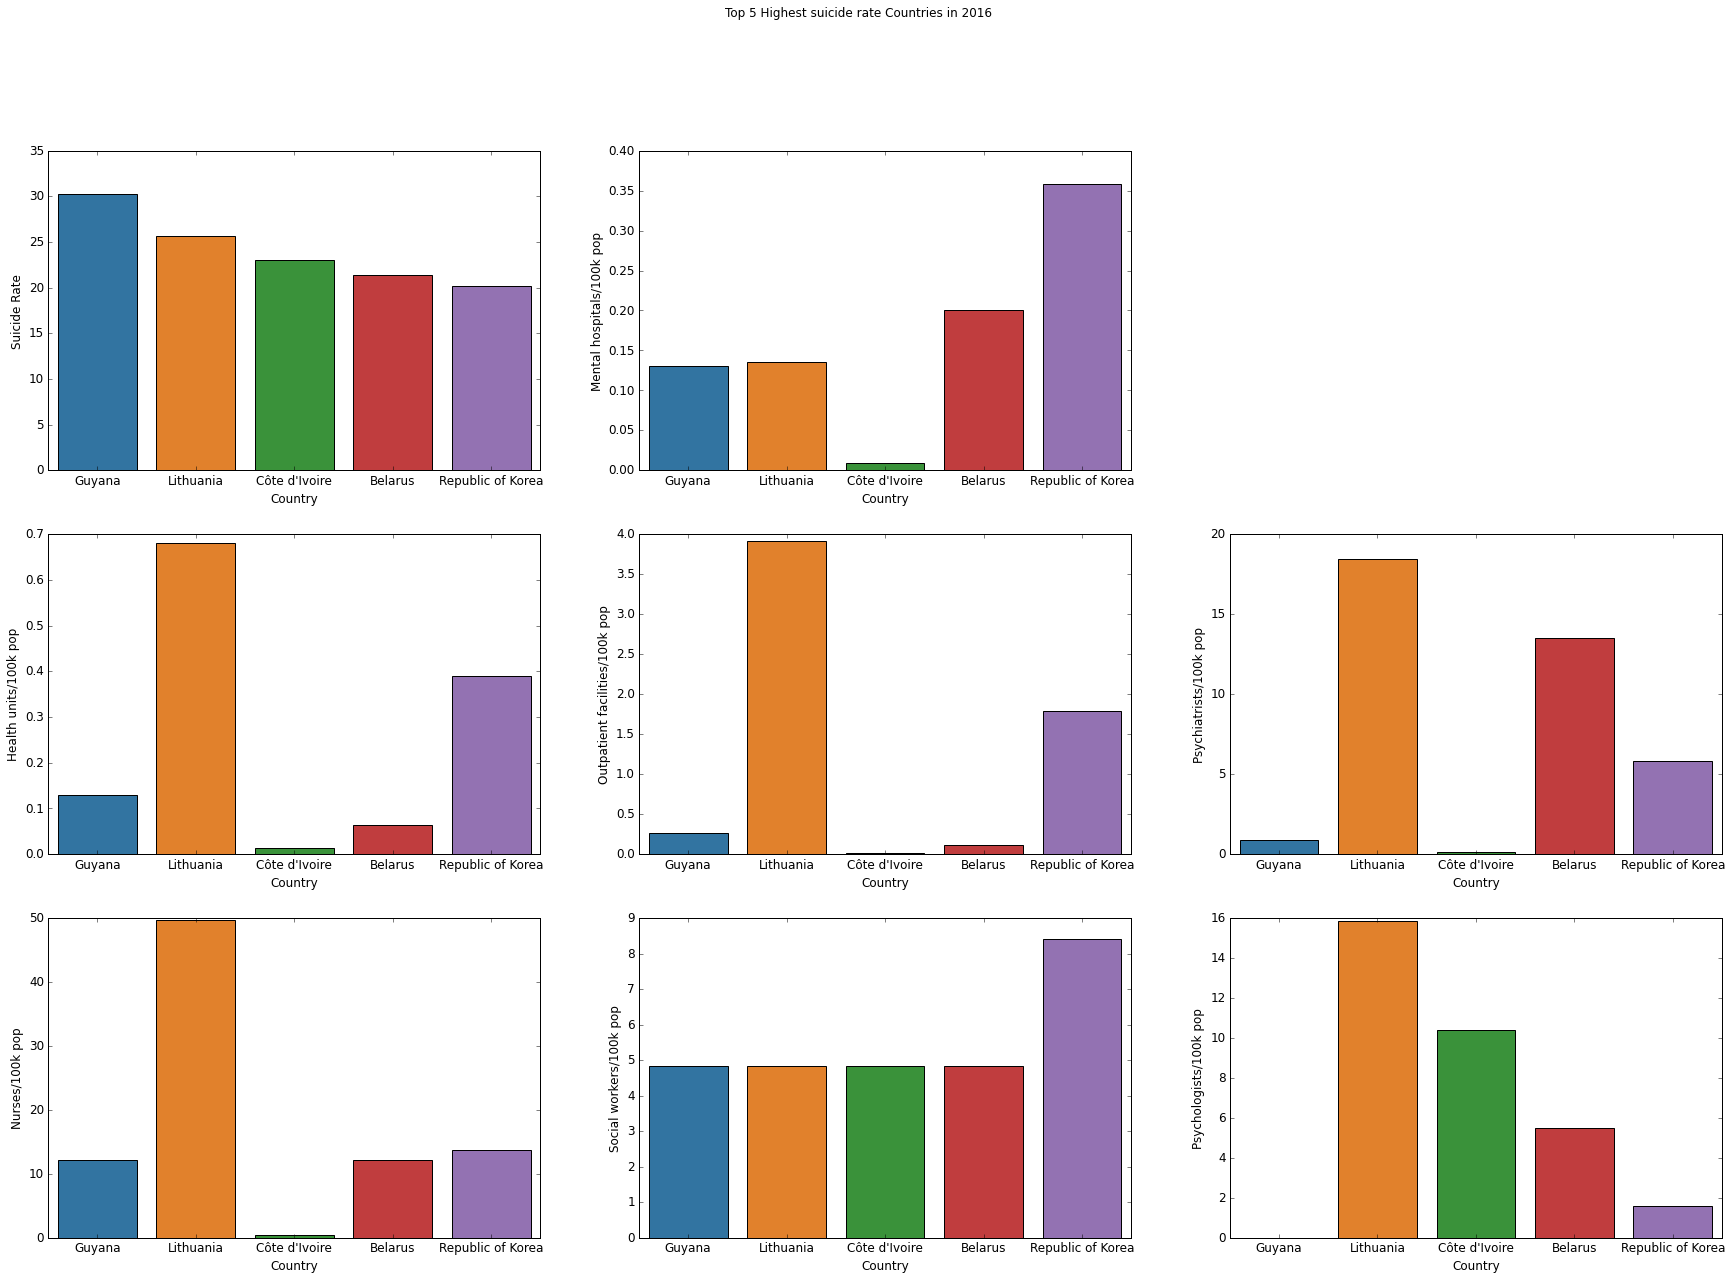

In [ ]:
#Top 5 Highest suicide rate Countries in 2016
df_top_5_suicide_rate_2016=df_2016.sort_values(['Suicide Rate'], ascending=False).head(5)
#Visualizing
plt.figure(figsize=(30,20))
plt.style.use('classic')
plt.subplot(331)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Suicide Rate',palette="tab10")
plt.suptitle('Top 5 Highest suicide rate Countries in 2016')
plt.xlabel('Country')
plt.ylabel('Suicide Rate')

plt.subplot(332)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Mental_hospitals',palette="tab10")
plt.xlabel('Country')
plt.ylabel('Mental hospitals/100k pop')
plt.subplot(334)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Health_units',palette="tab10")
plt.xlabel('Country')
plt.ylabel('Health units/100k pop')
plt.subplot(335)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Outpatient_facilities',palette="tab10")
plt.xlabel('Country')
plt.ylabel('Outpatient facilities/100k pop')
plt.subplot(336)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Psychiatrists',palette="tab10")
plt.xlabel('Country')
plt.ylabel('Psychiatrists/100k pop')
plt.subplot(337)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Nurses',palette="tab10")
plt.xlabel('Country')
plt.ylabel('Nurses/100k pop')
plt.subplot(338)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Social_workers',palette="tab10")
plt.xlabel('Country')
plt.ylabel('Social workers/100k pop')
plt.subplot(339)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Psychologists',palette="tab10")
plt.xlabel('Country')
plt.ylabel('Psychologists/100k pop')
plt.show()

In [ ]:
df_top_5_suicide_rate_2016

,Country,Suicide Rate,Year the law was enacted (latest revision),Publication year of the policy or plan (latest revision),Mental_hospitals,Health_units,Outpatient_facilities,Psychiatrists,Nurses,Social_workers,Psychologists
70,Guyana,30.20,1930,2015.00,0.13,0.13,0.26,0.91,12.12,4.83,0.00
96,Lithuania,25.70,2005,2016.00,0.14,0.68,3.92,18.45,49.76,4.83,15.86
43,Côte d'Ivoire,23.00,0,2008.00,0.01,0.01,0.02,0.13,0.38,4.83,10.42
14,Belarus,21.40,2015,2016.00,0.20,0.06,0.12,13.50,12.12,4.83,5.51
131,Republic of Korea,20.20,2016,2016.00,0.36,0.39,1.79,5.79,13.66,8.40,1.59


### Top 5 Lowest suicide rate Countries in 2016

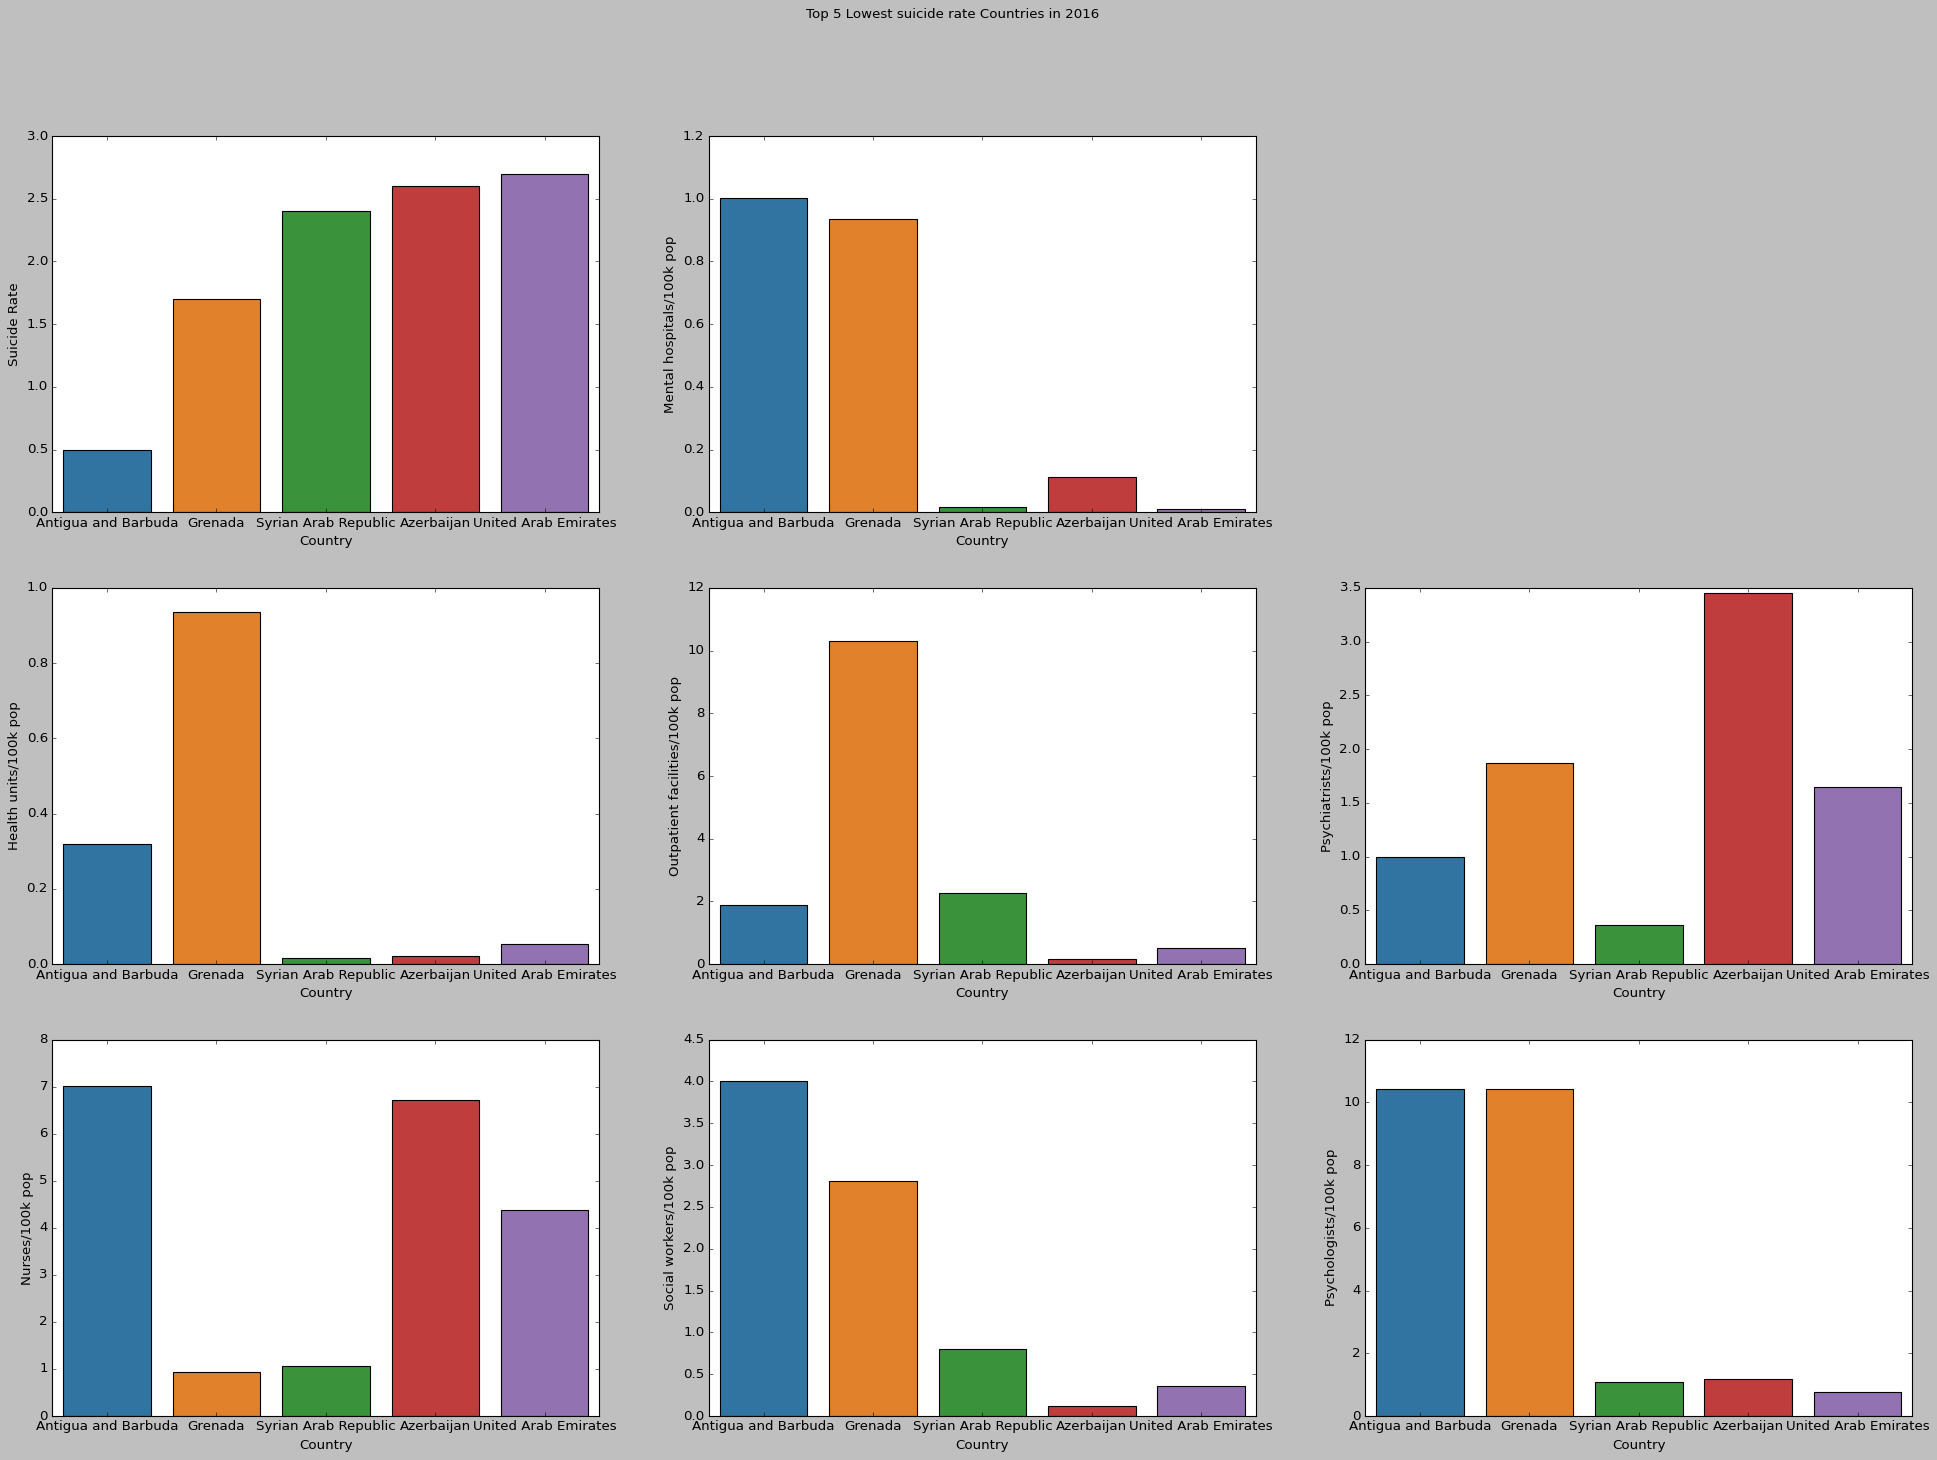

In [ ]:
#Top 5 Lowest suicide rate Countries in 2016
df_top_5_suicide_rate_2016=df_2016.sort_values(['Suicide Rate'], ascending=True).head(5)
#Visualizing
plt.figure(figsize=(30,20))
plt.style.use('classic')
plt.subplot(331)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Suicide Rate',palette="tab10")
plt.suptitle('Top 5 Lowest suicide rate Countries in 2016')
plt.xlabel('Country')
plt.ylabel('Suicide Rate')

plt.subplot(332)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Mental_hospitals',palette="tab10")
plt.xlabel('Country')
plt.ylabel('Mental hospitals/100k pop')
plt.subplot(334)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Health_units',palette="tab10")
plt.xlabel('Country')
plt.ylabel('Health units/100k pop')
plt.subplot(335)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Outpatient_facilities',palette="tab10")
plt.xlabel('Country')
plt.ylabel('Outpatient facilities/100k pop')
plt.subplot(336)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Psychiatrists',palette="tab10")
plt.xlabel('Country')
plt.ylabel('Psychiatrists/100k pop')
plt.subplot(337)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Nurses',palette="tab10")
plt.xlabel('Country')
plt.ylabel('Nurses/100k pop')
plt.subplot(338)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Social_workers',palette="tab10")
plt.xlabel('Country')
plt.ylabel('Social workers/100k pop')
plt.subplot(339)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Psychologists',palette="tab10")
plt.xlabel('Country')
plt.ylabel('Psychologists/100k pop')
plt.show()

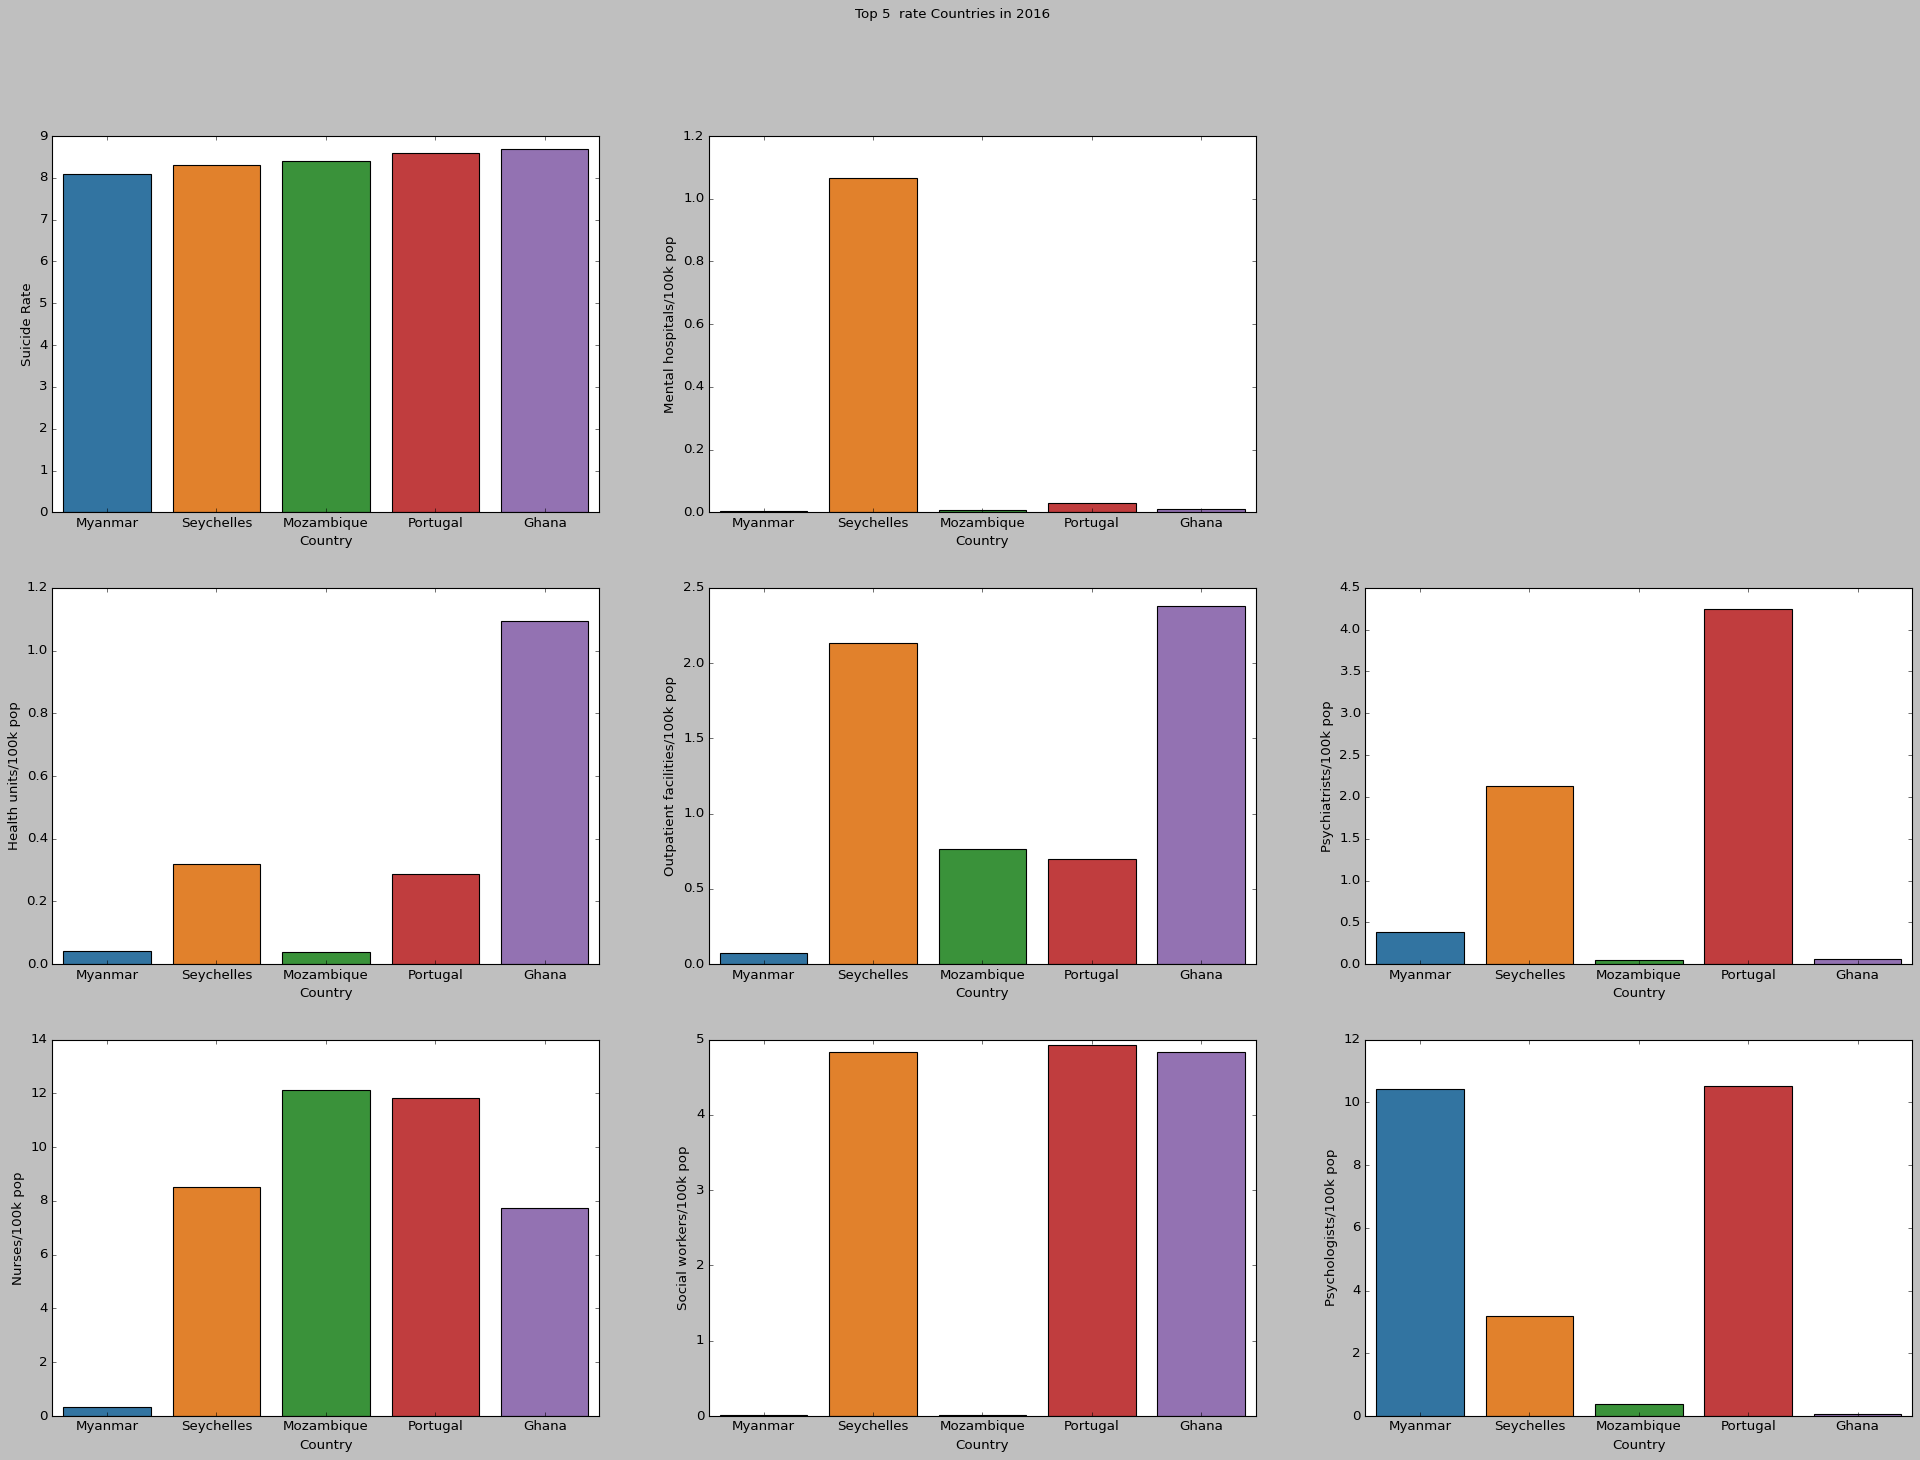

In [ ]:

#Top 5 Lowest suicide rate Countries in 2016
df_top_5_suicide_rate_2016=df_2016.sort_values(['Suicide Rate'], ascending=True).iloc[53:58]
#Visualizing
plt.figure(figsize=(30,20))
plt.style.use('classic')
plt.subplot(331)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Suicide Rate',palette="tab10")
plt.suptitle('Top 5  rate Countries in 2016')
plt.xlabel('Country')
plt.ylabel('Suicide Rate')

plt.subplot(332)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Mental_hospitals',palette="tab10")
plt.xlabel('Country')
plt.ylabel('Mental hospitals/100k pop')
plt.subplot(334)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Health_units',palette="tab10")
plt.xlabel('Country')
plt.ylabel('Health units/100k pop')
plt.subplot(335)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Outpatient_facilities',palette="tab10")
plt.xlabel('Country')
plt.ylabel('Outpatient facilities/100k pop')
plt.subplot(336)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Psychiatrists',palette="tab10")
plt.xlabel('Country')
plt.ylabel('Psychiatrists/100k pop')
plt.subplot(337)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Nurses',palette="tab10")
plt.xlabel('Country')
plt.ylabel('Nurses/100k pop')
plt.subplot(338)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Social_workers',palette="tab10")
plt.xlabel('Country')
plt.ylabel('Social workers/100k pop')
plt.subplot(339)
sns.barplot(data=df_top_5_suicide_rate_2016,x='Country',y='Psychologists',palette="tab10")
plt.xlabel('Country')
plt.ylabel('Psychologists/100k pop')
plt.show()

In [ ]:
df_2016.corr()

,Suicide Rate,Publication year of the policy or plan (latest revision),Mental_hospitals,Health_units,Outpatient_facilities,Psychiatrists,Nurses,Social_workers,Psychologists
Suicide Rate,1.00,0.13,0.07,0.07,-0.01,0.22,0.12,0.04,-0.03
Publication year of the policy or plan (latest revision),0.13,1.00,0.02,-0.02,-0.17,0.04,0.02,0.07,0.04
Mental_hospitals,0.07,0.02,1.00,0.09,0.26,0.17,0.34,0.05,0.06
Health_units,0.07,-0.02,0.09,1.00,0.29,0.20,0.16,0.02,0.09
Outpatient_facilities,-0.01,-0.17,0.26,0.29,1.00,0.17,0.27,-0.02,0.03
Psychiatrists,0.22,0.04,0.17,0.20,0.17,1.00,0.35,0.13,0.43
Nurses,0.12,0.02,0.34,0.16,0.27,0.35,1.00,0.01,0.02
Social_workers,0.04,0.07,0.05,0.02,-0.02,0.13,0.01,1.00,0.44
Psychologists,-0.03,0.04,0.06,0.09,0.03,0.43,0.02,0.44,1.00


# V/Save Dataframe

## Save CSV

In [ ]:
df_country_suicide.to_csv( './drive/MyDrive/Final_project_Data/DATASET/CLEANED_DATA/country_suicide_rate.csv',index= False)
df_suicide_rate.to_csv( './drive/MyDrive/Final_project_Data/DATASET/CLEANED_DATA/suicide_rate.csv',index= False)
df_2016.to_csv( './drive/MyDrive/Final_project_Data/DATASET/CLEANED_DATA/mental_health.csv',index= False)

## Load CSV (Check)

In [ ]:
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
df_country_suicide_rate=pd.read_csv('/content/drive/MyDrive/Final_project_Data/DATASET/CLEANED_DATA/country_suicide_rate.csv')
df_suicide_rate=pd.read_csv('/content/drive/MyDrive/Final_project_Data/DATASET/CLEANED_DATA/suicide_rate.csv')
df_mental_health_2016=pd.read_csv('/content/drive/MyDrive/Final_project_Data/DATASET/CLEANED_DATA/mental_health.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_country_suicide_rate.head()

,Country,Year,GDP ($),GDP/Capita ($),No.Suicides,Population,Suicides_rate/100k pop
0,Albania,1987,2156624900,796,73,2709600,2.69
1,Albania,1988,2126000000,769,63,2764300,2.28
2,Albania,1989,2335124988,833,68,2803100,2.43
3,Albania,1992,709452584,251,47,2822500,1.67
4,Albania,1993,1228071038,437,73,2807300,2.60


In [ ]:
df_suicide_rate.head()

,Country,Year,Sex,Age,No.Suicides,Population,Suicides_rate/100k pop,GDP ($),GDP/Capita ($)
0,Albania,1987,Female,05-14 years,0,311000,0.00,2156624900,796
1,Albania,1987,Female,15-24 years,14,289700,4.83,2156624900,796
2,Albania,1987,Female,25-34 years,4,257200,1.56,2156624900,796
3,Albania,1987,Female,35-54 years,6,278800,2.15,2156624900,796
4,Albania,1987,Female,55-74 years,0,144600,0.00,2156624900,796


In [ ]:
df_mental_health_2016.head()

,Country,Suicide Rate,Year the law was enacted (latest revision),Publication year of the policy or plan (latest revision),Mental_hospitals,Health_units,Outpatient_facilities,Psychiatrists,Nurses,Social_workers,Psychologists
0,Afghanistan,6.40,1987,2016.00,0.00,0.01,0.01,0.23,0.10,4.83,0.30
1,Albania,5.60,2012,2013.00,0.07,0.07,0.41,1.47,6.88,1.06,1.23
2,Algeria,3.30,1905,0.00,0.05,0.07,0.05,4.25,11.82,4.92,10.51
3,Angola,8.90,0,0.00,0.01,0.32,1.88,0.06,0.66,0.02,0.18
4,Antigua and Barbuda,0.50,1957,2013.00,1.00,0.32,1.88,1.00,7.00,4.00,10.42
